<a href="https://colab.research.google.com/github/EdwarRangel/Parcial/blob/main/copia_de_untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [ ]:

datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬', encoding='latin-1')


<ipython-input-143-3264df12a921>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬', encoding='latin-1')


In [ ]:
print(datos_icfes.info())
print(datos_icfes.head())

<class 'pandas.core.frame.DataFrame'>
Index: 12704 entries, TI¬COLOMBIA¬F¬04/11/2005¬20231¬SB11202310019049¬ESTUDIANTE¬COLOMBIA¬CUNDINAMARCA¬25¬CHÍA¬25175¬No¬Estrato 3¬5 a 6¬Cuatro¬Educación profesional completa¬Educación profesional completa¬Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial¬Trabaja en el hogar, no trabaja o estudia¬Si¬Si¬Si¬Si¬Si¬Si¬Si¬Si¬MÁS DE 100 LIBROS¬Todos o casi todos los días¬Todos o casi todos los días¬Todos o casi todos los días¬Peor¬Entre 1 y 2 horas¬Entre 1 y 3 horas¬0¬No¬021485¬311001002347¬COLEGIO BILINGUE  JOSE MAX LEON                                           ¬118¬CUNDINAMARCA¬MIXTO¬NO OFICIAL¬B¬N¬ACADÉMICO¬311001002347¬COL JOSE MAX LEON¬S¬RURAL¬COMPLETA¬25214¬COTA¬25¬CUNDINAMARCA¬N¬25899¬ZIPAQUIRÁ¬CUNDINAMARCA¬25¬100¬100¬4¬83¬100¬4¬77¬99¬4¬77¬97¬4¬87¬94¬B+¬422¬100¬67.5328144920732¬4¬4¬100¬PUBLICAR to TI¬COLOMBIA¬M¬23/01/2006¬20231¬SB11202310000989¬ESTUDIANTE¬COLOMBIA¬VALLE¬76¬CALI¬76001¬No¬Estrato 4¬3 a 4¬Tres¬Educación pro

In [ ]:
datos_icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

In [ ]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]

In [ ]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL','PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
tabla_regresion.head(4)


In [ ]:
x= np.array(icfes_sin_nan[['PUNT_INGLES']]).reshape(-1,1)
y= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(x, y)
Pred_lineal = regresion.predict(x)

In [ ]:
x0= np.array(icfes_sin_nan[['PUNT_INGLES']]).reshape(-1,1)
y0= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx0, testx0, trainy0, testy0 = train_test_split(x0, y0, test_size = 0.2)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx0, trainy0)
Pred_lineal0 = regresion0.predict(testx0)

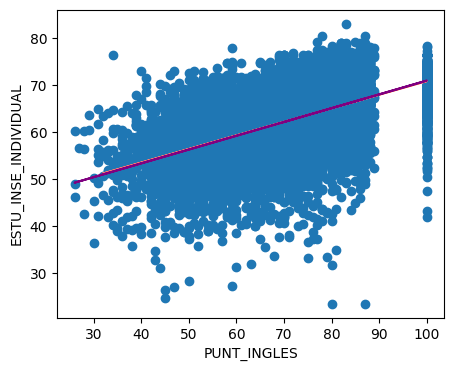

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_INGLES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx0, Pred_lineal0, color='salmon')
plt.plot(x, Pred_lineal, color='purple')
plt.xlabel('PUNT_INGLES')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

In [ ]:
x11= np.array(icfes_sin_nan[['PUNT_LECTURA_CRITICA']]).reshape(-1,1)
y11= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal11 = LinearRegression()
regresion11 = modelo_lineal11.fit(x11, y11)
Pred_lineal11 = regresion11.predict(x11)

In [ ]:
x1= np.array(icfes_sin_nan[['PUNT_LECTURA_CRITICA']]).reshape(-1,1)
y1= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx1, testx1, trainy1, testy1 = train_test_split(x1, y1, test_size = 0.2)
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(trainx1, trainy1)
Pred_lineal1 = regresion1.predict(testx1)


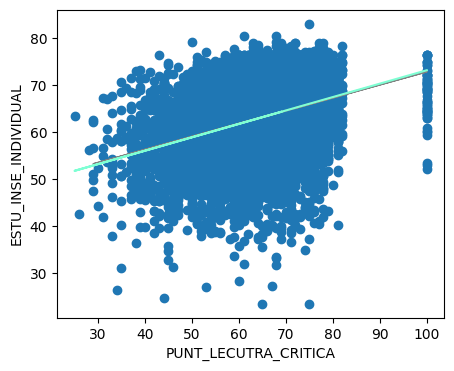

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx1, Pred_lineal1, color='gray')
plt.plot(x11, Pred_lineal11, color='aquamarine')
plt.xlabel('PUNT_LECUTRA_CRITICA')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

In [ ]:
x22= np.array(icfes_sin_nan[['PUNT_MATEMATICAS']]).reshape(-1,1)
y22= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal22 = LinearRegression()
regresion22 = modelo_lineal22.fit(x22, y22)
Pred_lineal22 = regresion22.predict(x22)

In [ ]:
x2= np.array(icfes_sin_nan[['PUNT_MATEMATICAS']]).reshape(-1,1)
y2= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx2, testx2, trainy2, testy2 = train_test_split(x2, y2, test_size = 0.2)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(trainx2, trainy2)
Pred_lineal2 = regresion2.predict(testx2)

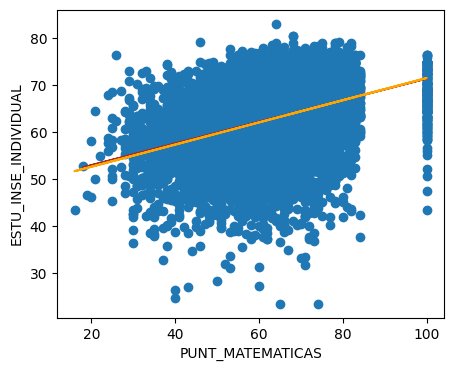

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx2, Pred_lineal2, color='brown')
plt.plot(x22, Pred_lineal22, color='orange')
plt.xlabel('PUNT_MATEMATICAS')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

In [ ]:
x33= np.array(icfes_sin_nan[['PUNT_C_NATURALES']]).reshape(-1,1)
y33= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal33 = LinearRegression()
regresion33 = modelo_lineal33.fit(x33, y33)
Pred_lineal33 = regresion33.predict(x33)

In [ ]:
x3= np.array(icfes_sin_nan[['PUNT_C_NATURALES']]).reshape(-1,1)
y3= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx3, testx3, trainy3, testy3 = train_test_split(x3, y3, test_size = 0.3)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(trainx3, trainy3)
Pred_lineal3 = regresion3.predict(testx3)

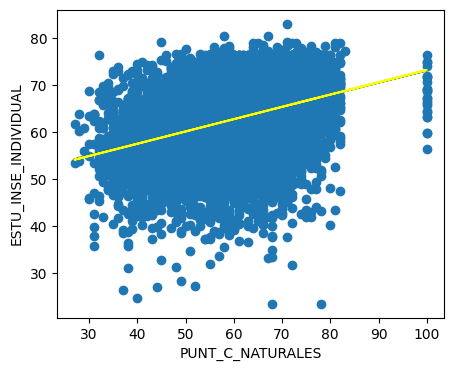

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx3, Pred_lineal3, color='green')
plt.plot(x33, Pred_lineal33, color='yellow')
plt.xlabel('PUNT_C_NATURALES')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

In [ ]:
x44= np.array(icfes_sin_nan[['PUNT_SOCIALES_CIUDADANAS']]).reshape(-1,1)
y44= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal44 = LinearRegression()
regresion44 = modelo_lineal11.fit(x44, y44)
Pred_lineal44 = regresion44.predict(x44)

In [ ]:
x4= np.array(icfes_sin_nan[['PUNT_SOCIALES_CIUDADANAS']]).reshape(-1,1)
y4= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx4, testx4, trainy4, testy4 = train_test_split(x4, y4, test_size = 0.4)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(trainx4, trainy4)
Pred_lineal4 = regresion4.predict(testx4)

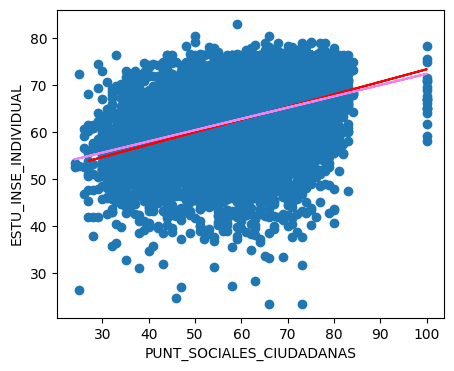

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx4, Pred_lineal4, color='red')
plt.plot(x44, Pred_lineal44, color='violet')
plt.xlabel('PUNT_SOCIALES_CIUDADANAS')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

In [ ]:
X= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)
trainX.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8476,59,69,58,50,61.0
4528,58,55,54,61,65.0
10654,51,49,49,43,71.0
10381,55,47,49,57,76.0
5767,65,70,62,59,100.0


In [ ]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
Pred_lineal = regresion.predict(testX)

In [ ]:
r2_lineal= regresion.score(testX, testY)
r2_lineal

0.30400789508977766

In [ ]:
X1= icfes_sin_nan[['PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y1= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX1, testX1, trainY1, testY1 = train_test_split(X1, Y1, test_size = 0.2)
trainX1.head(5)

,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
12472,80,71,75,80.0
11638,55,47,60,70.0
4816,41,50,57,66.0
10106,62,72,75,88.0
6703,53,48,44,34.0


In [ ]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(trainX1, trainY1)
Pred_lineal1 = regresion1.predict(testX1)
r2_lineal1= regresion1.score(testX1, testY1)
r2_lineal1

0.2667351524972045

In [ ]:
X2= icfes_sin_nan[['PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y2= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX2, testX2, trainY2, testY2 = train_test_split(X2, Y2, test_size = 0.2)
trainX2.head(5)

,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8509,60,62,62,71.0
1420,66,68,72,78.0
5455,73,72,70,78.0
8516,72,68,66,70.0
5612,69,62,73,63.0


In [ ]:
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(trainX2, trainY2)
Pred_lineal2 = regresion2.predict(testX2)
r2_lineal2= regresion2.score(testX2, testY2)
r2_lineal2

0.3039641052063311

In [ ]:
X3= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y3= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX3, testX3, trainY3, testY3 = train_test_split(X3, Y3, test_size = 0.2)
trainX3.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
12356,77,77,79,100.0
9089,78,72,63,85.0
185,59,60,58,62.0
1606,55,48,56,53.0
8253,38,49,32,45.0


In [ ]:
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(trainX3, trainY3)
Pred_lineal3 = regresion3.predict(testX3)
r3_lineal3= regresion3.score(testX3, testY3)
r3_lineal3

0.3310846270763568

In [ ]:
X4= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_INGLES']]
Y4= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX4, testX4, trainY4, testY4 = train_test_split(X4, Y4, test_size = 0.2)
trainX4.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_INGLES
3446,75,73,66,85.0
10151,77,71,73,84.0
860,57,43,49,57.0
4916,63,52,59,76.0
8157,57,49,48,75.0


In [ ]:
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(trainX4, trainY4)
Pred_lineal4 = regresion4.predict(testX4)
r4_lineal4= regresion4.score(testX4, testY4)
r4_lineal4

0.2986736509073217

In [ ]:
X5= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS']]
Y5= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX5, testX5, trainY5, testY5 = train_test_split(X5, Y5, test_size = 0.2)
trainX5.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS
3390,69,55,49,57
12654,78,76,77,80
1531,68,73,71,68
8488,60,64,60,58
12244,71,81,73,68


In [ ]:
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(trainX5, trainY5)
Pred_lineal5 = regresion5.predict(testX5)
r5_lineal5= regresion5.score(testX5, testY5)
r5_lineal5

0.19675260939615025

In [ ]:
X6= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_INGLES']]
Y6= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX6, testX6, trainY6, testY6 = train_test_split(X6, Y6, test_size = 0.2)
trainX6.head(5)

,PUNT_LECTURA_CRITICA,PUNT_INGLES
9552,62,75.0
9640,59,70.0
2710,71,78.0
1938,68,79.0
2996,68,75.0


In [ ]:
modelo_lineal6 = LinearRegression()
regresion6 = modelo_lineal6.fit(trainX6, trainY6)
Pred_lineal6 = regresion6.predict(testX6)
r6_lineal6= regresion6.score(testX6, testY6)
r6_lineal6

0.2782307543415625

In [ ]:
XY, Z = icfes_sin_nan[['PUNT_LECTURA_CRITICA', 'PUNT_INGLES' ]], icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2)
trainXY.head(5)

,PUNT_LECTURA_CRITICA,PUNT_INGLES
7986,67,78.0
3576,63,57.0
12341,73,67.0
9693,65,75.0
1011,66,75.0


In [ ]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ)


LinearRegression()

In [ ]:
modelo1.score(testXY, testZ)

0.27654066296611357

In [ ]:
XY1, Z1 = icfes_sin_nan[['PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS' ]], icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainXY1, testXY1, trainZ1, testZ1 = train_test_split(XY1, Z1, test_size = 0.2)
trainXY1.head(5)

,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
4485,67,65
1343,57,48
282,69,74
8780,63,60
2323,71,62


In [ ]:
modelo2 = LinearRegression()
modelo2.fit(trainXY1, trainZ1)


LinearRegression()

In [ ]:
modelo2.score(testXY1, testZ1)

0.16485964457961144

In [ ]:
array = modelo1.coef_
array

array([0.00163566, 0.29547822])

In [ ]:
array1 = modelo2.coef_
array1

array([0.15817187, 0.1185222 ])

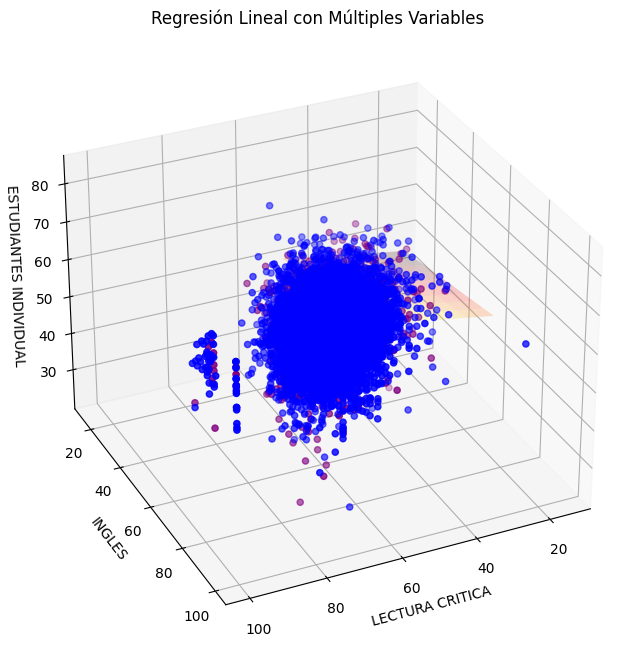

In [ ]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(15, 65, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["PUNT_LECTURA_CRITICA"], trainXY["PUNT_INGLES"], trainZ, c='blue',s=20)
ax.scatter(testXY["PUNT_LECTURA_CRITICA"], testXY["PUNT_INGLES"], testZ, c='purple',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('LECTURA CRITICA')
ax.set_ylabel('INGLES')
ax.set_zlabel('ESTUDIANTES INDIVIDUAL')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [ ]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
max_iter = 500,
activation = 'relu',
solver = 'adam',
learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10),
             learning_rate='invscaling', max_iter=500)

In [ ]:
mlp_reg.score(testX, testY)

0.2964220142609557

In [ ]:

X.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,100,83,77,77,87.0
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [ ]:
no_obs = np.array([[80, 60, 83, 73, 57]])
print('Se espera que el recién nacido pese', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el recién nacido pese [58.72571946] bajo el perceptrón multicapa y  [57.55922999] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
pearson_corr = icfes_sin_nan['PUNT_INGLES'].corr(icfes_sin_nan['ESTU_INSE_INDIVIDUAL'], method='pearson')
pearman_corr = icfes_sin_nan['PUNT_INGLES'].corr(icfes_sin_nan['ESTU_INSE_INDIVIDUAL'], method='spearman')
kendall_corr = icfes_sin_nan['PUNT_INGLES'].corr(icfes_sin_nan['ESTU_INSE_INDIVIDUAL'], method='kendall')
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5511549003261873, 0.565737484040732 y 0.39578544802151444.


In [ ]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_INGLES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_INGLES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_INGLES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5511549003261873, 0.565737484040732 y 0.39578544802151444.


In [ ]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.37666512872808017, 0.39393544035017275 y 0.2710503110002687.


In [ ]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3598554924882554, 0.36474626881201705 y 0.2505193571669217.


In [ ]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3572658294214808, 0.36242984564624287 y 0.24884271638677483.


In [ ]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.354778311549577, 0.3575861775493282 y 0.24636724048204137.


In [ ]:
icfes_connan =datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]

In [ ]:
X_no = icfes_connan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
                     'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
                     'PUNT_INGLES']]
mlp_reg.predict(X_no)

array([57.18629101, 58.58776681, 55.23496565, 57.99397532, 59.32579942,
       58.45277507, 61.72633469, 58.36269358, 65.37937207, 66.78679866,
       72.31070285, 64.65041547, 64.72973327, 59.11359465, 64.86889541,
       58.72582185, 59.21398353, 61.53664363, 59.61032085, 65.65142524,
       66.2062955 , 60.62322292, 57.04540594, 56.23846225, 57.12642291,
       58.53897988, 61.16561155, 62.43920918, 58.49480789, 61.82627187,
       65.02580432, 64.13444361, 61.49213007, 64.74611652, 56.62161683,
       64.93628669, 62.0291354 , 58.02323288, 60.84131389, 60.88649315,
       64.42963544, 55.6196576 , 63.54864642, 66.17935426, 66.46872615,
       61.6114734 , 56.17732205, 56.2356996 , 55.32131462, 56.45963364,
       62.94381397, 64.42203275, 64.63561607, 55.30015276, 56.10457705,
       62.60173433, 66.11852983, 60.06572614, 62.56015318, 62.85241744,
       58.78478722, 66.08387377, 71.05541146, 65.15430057, 65.63262401,
       61.39084298, 62.44922826, 55.98234846, 62.50878991, 56.17

In [ ]:
X = icfes_sin_nan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
y = icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Error cuadrático medio - Modelo Lineal: {mse_linear}")
print(f"Error cuadrático medio - Bosque Aleatorio: {mse_rf}")


Error cuadrático medio - Modelo Lineal: 40.816551311483394
Error cuadrático medio - Bosque Aleatorio: 42.61142479727269


In [ ]:
best_model = linear_model if mse_linear < mse_rf else rf_model
X_connan = icfes_connan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
icfes_connan['ESTU_INSE_INDIVIDUAL'] = best_model.predict(X_connan)

<ipython-input-151-ee0e7bc10c39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icfes_connan['ESTU_INSE_INDIVIDUAL'] = best_model.predict(X_connan)
